In [66]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

Problem 1.1.

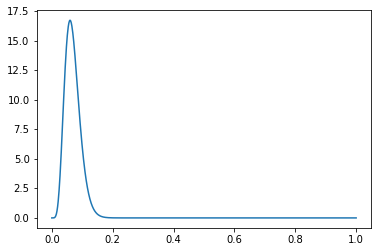

In [65]:
def posterior(theta, X, N, a, b):
    return scipy.stats.beta.pdf(theta, a + X, b + N - X)
theta = np.linspace(0, 1, 1000)
densities = posterior(theta, 6, 100, 1, 1)
plt.plot(theta, densities)
plt.show()

Problem 1.2.

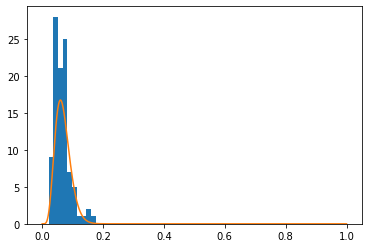

In [78]:
def posterior_sample(niterations, X, N, a, b):
    return scipy.stats.beta.rvs(a + X, b + N - X, size=niterations)
thetas = posterior_sample(100, X=6, N=100, a=1, b=1)
plt.hist(thetas)
plt.plot(theta, densities)
plt.show()

Problem 1.5

In [11]:
def proposal(theta):
    theta_prop = scipy.stats.norm.rvs(theta, 0.1, 1)
    return theta_prop[0] % 1

Problem 1.6.

In [48]:
def numerator(theta, X, N, a, b):
    return (scipy.stats.beta.pdf(theta, a, b) *
            scipy.stats.binom.pmf(X, N, theta))
def accept_reject(theta_current, theta_proposed, X, N, a, b):
    r = (numerator(theta_proposed, X, N, a, b) / 
         numerator(theta_current, X, N, a, b))
    u = scipy.stats.uniform.rvs(0, 1, 1)[0]
    if r > u:
        return theta_proposed
    else:
        return theta_current
accept_reject(0.52, 0.53, 6, 100, 1, 1)

0.52

Problem 1.7.

In [49]:
def step_and_accept_reject(theta_current, X, N, a, b):
    theta_proposed = proposal(theta_current)
    return accept_reject(theta_current, theta_proposed, X, N, a, b)

Problem 1.8.

In [56]:
def metropolis(niterations, theta0, X, N, a, b):
    thetas = []
    theta_current = theta0
    for i in range(niterations):
        theta_current = step_and_accept_reject(theta_current, X, N, a, b)
        thetas.append(theta_current)
    return thetas

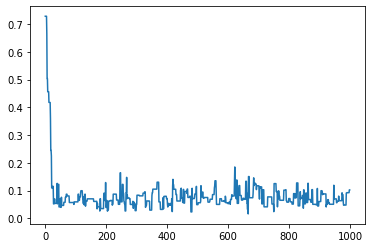

In [57]:
plt.plot(metropolis(1000, 0.8, 6, 100, 1, 1))
plt.show()

Problem 1.9.